In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv("Data_Cortex_Nuclear.csv",sep=",")
print(df.head())

  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...   pCFOS_N     SYP_N  H3AcK18_N  \
0  0.177565   2.373744  0.232224  ...  0.108336  0.427099   0.114783   
1  0.172817   2.292150  0.226972  ...  0.104315  0.441581   0.111974   
2  0.175722   2.283337  0.230247  ...  0.106219  0.435777   0.111883   
3  0.176463   2.152301  0.207004  ...  0.111262  0.391691   0.130405   
4  0.173627   2.134014  0.192158  ...  0.110694  0.434154   0.118481   

     EGR1_N  H3MeK4_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.131790  0.128186  1.675652   Control  Memantine   

In [339]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [340]:
df.isnull().sum()   #eksik veri çok fazla olduğu için farklı yöntemler uygulanarak eksik veriler kısa süre zarfında giderilecek

MouseID      0
DYRK1A_N     3
ITSN1_N      3
BDNF_N       3
NR1_N        3
            ..
CaNA_N       0
Genotype     0
Treatment    0
Behavior     0
class        0
Length: 82, dtype: int64

In [341]:
df.drop(["BAD_N", "BCL2_N", "H3AcK18_N", "EGR1_N", "H3MeK4_N"],axis=1,inplace=True)
 #ilk olarak eksik sayısı fazla sütunlar silinerek gidedrildi.
 #Eksik verinin olduğu satırlar silinseydi eğer daha fazla veri kaybı olacaktı.
 # veri sayısı 900 ve altı olan sütunlar silinecek

In [342]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [343]:
df["Bcatenin_N"]=df["Bcatenin_N"].interpolate() 
df["ELK_N"]=df["ELK_N"].interpolate() 
df["pCFOS_N"]=df["pCFOS_N"].interpolate()  # Veri kaybını azaltmak için belirlenen sütunlarda eksik veriler interpolasyon yöntemi ile tamamlandı.

In [344]:
df.dropna(inplace=True) # son olarak genel olarak tüm sütunlarda eksik verilerin bulunduğu satırlar veri setinden çıkarıldı.
print(df.head())

  MouseID  DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N  \
0   309_1  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830   
1   309_2  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636   
2   309_3  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011   
3   309_4  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886   
4   309_5  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106   

    pBRAF_N  pCAMKII_N   pCREB_N  ...  pGSK3B_Tyr216_N     SHH_N     pS6_N  \
0  0.177565   2.373744  0.232224  ...         0.831557  0.188852  0.106305   
1  0.172817   2.292150  0.226972  ...         0.849270  0.200404  0.106592   
2  0.175722   2.283337  0.230247  ...         0.846709  0.193685  0.108303   
3  0.176463   2.152301  0.207004  ...         0.833277  0.192112  0.103184   
4  0.173627   2.134014  0.192158  ...         0.878668  0.205604  0.104784   

    pCFOS_N     SYP_N    CaNA_N  Genotype  Treatment  Behavior   class  
0  0.108336  0.4270

In [345]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1073 entries, 0 to 1079
Data columns (total 77 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1073 non-null   object 
 1   DYRK1A_N         1073 non-null   float64
 2   ITSN1_N          1073 non-null   float64
 3   BDNF_N           1073 non-null   float64
 4   NR1_N            1073 non-null   float64
 5   NR2A_N           1073 non-null   float64
 6   pAKT_N           1073 non-null   float64
 7   pBRAF_N          1073 non-null   float64
 8   pCAMKII_N        1073 non-null   float64
 9   pCREB_N          1073 non-null   float64
 10  pELK_N           1073 non-null   float64
 11  pERK_N           1073 non-null   float64
 12  pJNK_N           1073 non-null   float64
 13  PKCA_N           1073 non-null   float64
 14  pMEK_N           1073 non-null   float64
 15  pNR1_N           1073 non-null   float64
 16  pNR2A_N          1073 non-null   float64
 17  pNR2B_N       

In [346]:
df.reset_index(inplace=True,drop=True) # indeksler resetlendi

In [347]:
df.drop(["MouseID"],axis=1,inplace=True) # İd kısmı veri setinden çıkarıldı.

In [348]:
print(df['Genotype'].unique()) #Genotip kategorik veriye dönüştürülmeden önce kontrol edildi.

['Control' 'Ts65Dn']


In [349]:
df=pd.get_dummies(df,columns=["Genotype"]) #Kategorik veriye dönüştürüldü.

In [350]:
print(df['Treatment'].unique()) #Genotip kategorik veriye dönüştürülmeden önce kontrol edildi.

['Memantine' 'Saline']


In [351]:
df=pd.get_dummies(df,columns=["Treatment"])#Kategorik veriye dönüştürüldü.

In [352]:
print(df['Behavior'].unique()) #Genotip kategorik veriye dönüştürülmeden önce kontrol edildi.

['C/S' 'S/C']


In [353]:
df=pd.get_dummies(df,columns=["Behavior"])#Kategorik veriye dönüştürüldü.

In [354]:
print(df.head()) #Kontrol edildi.

   DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
0  0.503644  0.747193  0.430175  2.816329  5.990152  0.218830  0.177565   
1  0.514617  0.689064  0.411770  2.789514  5.685038  0.211636  0.172817   
2  0.509183  0.730247  0.418309  2.687201  5.622059  0.209011  0.175722   
3  0.442107  0.617076  0.358626  2.466947  4.979503  0.222886  0.176463   
4  0.434940  0.617430  0.358802  2.365785  4.718679  0.213106  0.173627   

   pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N    CaNA_N   class  \
0   2.373744  0.232224  1.750936  ...  0.108336  0.427099  1.675652  c-CS-m   
1   2.292150  0.226972  1.596377  ...  0.104315  0.441581  1.743610  c-CS-m   
2   2.283337  0.230247  1.561316  ...  0.106219  0.435777  1.926427  c-CS-m   
3   2.152301  0.207004  1.595086  ...  0.111262  0.391691  1.700563  c-CS-m   
4   2.134014  0.192158  1.504230  ...  0.110694  0.434154  1.839730  c-CS-m   

   Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  Treatment_Salin

In [355]:
print(df['class'].unique()) #sınıf kısmı sayısal değerlere dönüştürülmeden önce kontrol gerçekleştirildi.

['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


In [356]:
from sklearn.preprocessing import LabelEncoder  # String olan Sınıf değerlerinin dönüşümleri gerçekleştirildi.
enc = LabelEncoder() 
df['class'] = enc.fit_transform(df['class'])
df.tail()

DYRK1A_N   ITSN1_N    BDNF_N     NR1_N    NR2A_N    pAKT_N   pBRAF_N  \
1068  0.254860  0.463591  0.254860  2.092082  2.600035  0.211736  0.171262   
1069  0.272198  0.474163  0.251638  2.161390  2.801492  0.251274  0.182496   
1070  0.228700  0.395179  0.234118  1.733184  2.220852  0.220665  0.161435   
1071  0.221242  0.412894  0.243974  1.876347  2.384088  0.208897  0.173623   
1072  0.302626  0.461059  0.256564  2.092790  2.594348  0.251001  0.191811   

      pCAMKII_N   pCREB_N    pELK_N  ...   pCFOS_N     SYP_N    CaNA_N  class  \
1068   2.483740  0.207317  1.057971  ...  0.183324  0.374088  1.364823      7   
1069   2.512737  0.216339  1.081150  ...  0.175674  0.375259  1.364478      7   
1070   1.989723  0.185164  0.884342  ...  0.158296  0.422121  1.430825      7   
1071   2.086028  0.192044  0.922595  ...  0.196296  0.397676  1.404031      7   
1072   2.361816  0.223632  1.064085  ...  0.187556  0.420347  1.370999      7   

      Genotype_Control  Genotype_Ts65Dn  Treatment_Memantine  \
1068                 0                1                    0   
1069                 0                1                    0   
1070                 0                1                    0   
1071                 0                1                    0   
1072                 0                1                    0   

      Treatment_Saline  Behavior_C/S  Behavior_S/C  
1068                 1             0             1  
1069                 1             0             1  
1070                 1             0             1  
1071                 1             0             1  
1072                 1             0             1  

[5 rows x 79 columns]

In [357]:
print(df['class'].unique()) # 8 farklı output değerinin 1'den 7'ye kadar kodlanmasının kontolü gerçekleştirildi. 

[0 2 1 3 4 6 5 7]


# MLP K-fold , Grid search

In [358]:
In [27]: df=df.rename(columns = {'class':'output'}) # Sürekli sütun isminin class (hazır bir komut) olmasından dolayı hatayla karşılaşmamdan dolayı ismini output olarak değiştirdim

In [359]:
y=df.output.values
x_data=df.drop(["output"],axis=1)

In [360]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)) 

In [361]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (858, 78)
y_train: (858,)
x_test: (215, 78)
y_test: (215,)


In [305]:
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier(random_state=1, alpha=0.01, hidden_layer_sizes=(5,3),solver="sgd") # Denenen ilk parametreler (orta boyutlu veri kullanıldığı için sgd)
mlpc.fit(x_train,y_train)                    #ilk olarak rastgele verilen parametreler ile elde edilen sonuç ile grid search sonrası elde edilen sonuçlar karşılaştırılacaktır.

C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(alpha=0.01, hidden_layer_sizes=(5, 3), random_state=1,
              solver='sgd')

In [306]:
print("mlpc score:",mlpc.score(x_test,y_test)) 

mlpc score: 0.42790697674418604


In [307]:
mlpc_2=MLPClassifier(random_state=1,solver="lbfgs",activation="logistic",hidden_layer_sizes=(8,4))
mlpc_2.fit(x_train,y_train)
print("mlpc_2 score:",mlpc_2.score(x_test,y_test)) #İkinci deneme, olarak sonucu daha yükselten parametreler kullanıldı.

mlpc_2 score: 0.6744186046511628


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:471: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [313]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=mlpc,X=x,y=y,cv=5)  #train-test ayrımını doğru bir şekilde yapıldığının kontrolü için cross validation yöntemi kullanıldı.
                                                     
for score in scores:
    print(score)
    
print("ortalama skor:",np.mean(scores)) 

C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.5395348837209303
0.4744186046511628
0.4744186046511628
0.5700934579439252
0.4252336448598131
ortalama skor: 0.4967398391653989


C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [323]:
x=np.asarray(x)            #sonraki kısımda hata verdiği için bu dönüşüm gerçekleştirildi.
print(x[train_indexler])  # pandas olark görüyor numpy'a çevrildi.

[[0.06325303 0.08765961 0.42800316 ... 0.         0.         1.        ]
 [0.05966279 0.10713869 0.58295542 ... 0.         0.         1.        ]
 [0.06136058 0.11357216 0.58110001 ... 0.         0.         1.        ]
 ...
 [0.03516306 0.06355603 0.31137014 ... 1.         0.         1.        ]
 [0.03201796 0.07107097 0.33717276 ... 1.         0.         1.        ]
 [0.06634184 0.09150314 0.37013319 ... 1.         0.         1.        ]]


In [324]:
y=np.asarray(y)  #sonraki kısımda hata verdiği için bu dönüşüm gerçekleştirildi.
print(y[train_indexler])

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 

In [325]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier

scores=[]

kf=KFold(n_splits=4,random_state=1)
mlpc=MLPClassifier(solver="lbfgs",activation="relu",hidden_layer_sizes=(10,10)) 

for train_indexler,test_indexler in kf.split(x):       #Elimizdeki verileri belli aralıklarla %25'lik olarak böündü.
    mlpc.fit(x[train_indexler],y[train_indexler])
    score=mlpc.score(x[test_indexler],y[test_indexler])
    scores.append(score)
    print(score)
    
print("ortalama score:",np.mean(scores))

0.4423791821561338
0.48880597014925375
0.4962686567164179
0.11567164179104478
ortalama score: 0.38578136270321256


In [362]:
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values 

In [363]:
 from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [328]:
 from sklearn.model_selection import GridSearchCV

mlpc_params={"alpha":[0.1,0.01,0.001,0.0001],  #Parametreler test edildi, daha önceki kullanılan parametreler dahil en başarılı sonuvu bulabilmek için
            "hidden_layer_sizes":[(10,10),(3,3,3),(100,100),(5,3),(8,4)],
            "solver":["lbfgs","adam","sgd"]}

mlpc=MLPClassifier(activation="logistic",random_state=1)

mlpc_cv_model=GridSearchCV(mlpc,mlpc_params,cv=10,n_jobs=-1,verbose=2).fit(x_train,y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  1.7min finished


In [329]:
print(mlpc_cv_model.best_params_) #en başarılı parametreler bulundu.

{'alpha': 0.1, 'hidden_layer_sizes': (10, 10), 'solver': 'lbfgs'}


In [330]:
mlpc_tuned=MLPClassifier(alpha=0.1,hidden_layer_sizes=(10,10),solver="lbfgs").fit(x_train,y_train)
print("score:",mlpc_tuned.score(x_test,y_test))       #en başarılı parametreler sonucunda skor hesaplandı.

score: 1.0


In [331]:
print(df.duplicated())  #Sonuç 1(%100) çıkınca tekrar eden verilerden dolayı aşırı öğrenmenin olup olmadığı kontrol edildi.

0       False
1       False
2       False
3       False
4       False
        ...  
1068    False
1069    False
1070    False
1071    False
1072    False
Length: 1073, dtype: bool


In [332]:
print(df[df.duplicated()])   #Sonuç 1(%100) çıkınca tekrar eden verilerden dolayı aşırı öğrenmenin olup olmadığı kontrol edildi.

Empty DataFrame
Columns: [DYRK1A_N, ITSN1_N, BDNF_N, NR1_N, NR2A_N, pAKT_N, pBRAF_N, pCAMKII_N, pCREB_N, pELK_N, pERK_N, pJNK_N, PKCA_N, pMEK_N, pNR1_N, pNR2A_N, pNR2B_N, pPKCAB_N, pRSK_N, AKT_N, BRAF_N, CAMKII_N, CREB_N, ELK_N, ERK_N, GSK3B_N, JNK_N, MEK_N, TRKA_N, RSK_N, APP_N, Bcatenin_N, SOD1_N, MTOR_N, P38_N, pMTOR_N, DSCR1_N, AMPKA_N, NR2B_N, pNUMB_N, RAPTOR_N, TIAM1_N, pP70S6_N, NUMB_N, P70S6_N, pGSK3B_N, pPKCG_N, CDK5_N, S6_N, ADARB1_N, AcetylH3K9_N, RRP1_N, BAX_N, ARC_N, ERBB4_N, nNOS_N, Tau_N, GFAP_N, GluR3_N, GluR4_N, IL1B_N, P3525_N, pCASP9_N, PSD95_N, SNCA_N, Ubiquitin_N, pGSK3B_Tyr216_N, SHH_N, pS6_N, pCFOS_N, SYP_N, CaNA_N, output, Genotype_Control, Genotype_Ts65Dn, Treatment_Memantine, Treatment_Saline, Behavior_C/S, Behavior_S/C]
Index: []

[0 rows x 79 columns]


# Modeli Değerlendirme

In [364]:
 import numpy as np               
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data)).values 

In [365]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [367]:
mlpc_tuned=MLPClassifier(alpha=0.1,hidden_layer_sizes=(10,10),solver="lbfgs").fit(x_train,y_train)

In [371]:
import sklearn.metrics as metrics      #sklearn kütüphanesi gerekli
mlpc.fit(x_train,y_train)            #fit işlemi gerçekleştirildi.
y_pred=mlpc.predict(x_test)

C:\Users\hsncm\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [372]:
acc=metrics.accuracy_score(y_test,y_pred) #accuracy score hesaplandı.
print("Accuracy:",acc)

Accuracy: 1.0


In [373]:
cm=metrics.confusion_matrix(y_test,y_pred)
print(cm)           #confussion matrix ile modelimizin başarısı görüldü. 
#Bunun haricinde 2 tane daha multi class veri seti buldum ancak birisinde skor %45'lerde diğerinde ise bu veri setinde olduğu gibi %100 çıktı.

[[37  0  0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0]
 [ 0  0 32  0  0  0  0  0]
 [ 0  0  0 25  0  0  0  0]
 [ 0  0  0  0 31  0  0  0]
 [ 0  0  0  0  0 17  0  0]
 [ 0  0  0  0  0  0 31  0]
 [ 0  0  0  0  0  0  0 19]]


In [375]:
cr=metrics.classification_report(y_test,y_pred)
print(cr)    #modelimizde üzerinde çalışılmış veri seti kullanıldığından tam başarıyı ulaşılmış görünüyor.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00        32
           3       1.00      1.00      1.00        25
           4       1.00      1.00      1.00        31
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        31
           7       1.00      1.00      1.00        19

    accuracy                           1.00       215
   macro avg       1.00      1.00      1.00       215
weighted avg       1.00      1.00      1.00       215



#    Seaborn

In [376]:
import numpy as np  #seaborn için gerekli kütüphaneler yüklendi.
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [377]:
mlpc=MLPClassifier(activation="relu",solver="lbfgs",max_iter=1000,hidden_layer_sizes=(10,10))
mlpc.fit(x_train,y_train)

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, solver='lbfgs')

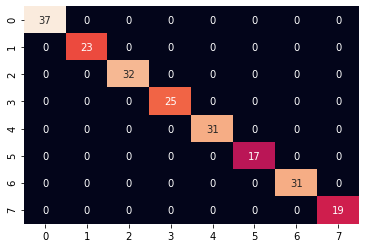

In [378]:
sns.heatmap(cm,cbar=False,annot=True,fmt="")  #Daha önce elde ettiğimiz sonuçların seaborn kütüphanesiyle görsel olarak gösterilmesi.

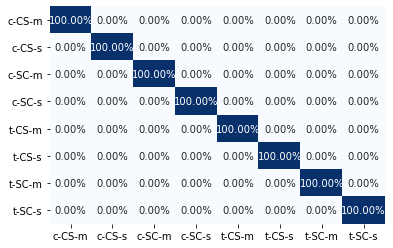

In [379]:
class_adlari=["c-CS-m","c-CS-s","c-SC-m", "c-SC-s" ,"t-CS-m" , "t-CS-s" ,"t-SC-m","t-SC-s" ] #Sınıf isimleri yazdırıldı.
sns.heatmap(cm/cm.sum(axis=1), annot=True, cbar=False, cmap="Blues",xticklabels=class_adlari,yticklabels=class_adlari,fmt=".2%")

#  Keras

In [422]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
import matplotlib.pyplot as plt
import numpy as np

In [423]:
model = Sequential()       #Keras için model oluşturuldu.
model.add(Dense(200, input_dim=78, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(8, activation='softmax')) 
model.add(Flatten())

#2'den fazla sınıfımız olduğu için softmax ve 8 tane sınıfımız olduğu için Dense:8

In [440]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])  #çoklu sınıf  "categorical_crossentropy"

In [443]:
egitim = model.fit(x, y, epochs=10, validation_data=(x_test,y_test),batch_size=10)

Epoch 1/10
108/108 [==============================] - 0s 2ms/step - loss: 7.7814e-07 - accuracy: 1.0000 - val_loss: 7.8013e-07 - val_accuracy: 1.0000
Epoch 2/10
108/108 [==============================] - 0s 2ms/step - loss: 7.7814e-07 - accuracy: 1.0000 - val_loss: 7.8013e-07 - val_accuracy: 1.0000
Epoch 3/10
108/108 [==============================] - 0s 1ms/step - loss: 7.7814e-07 - accuracy: 1.0000 - val_loss: 7.8013e-07 - val_accuracy: 1.0000
Epoch 4/10
108/108 [==============================] - 0s 1ms/step - loss: 7.7814e-07 - accuracy: 1.0000 - val_loss: 7.8013e-07 - val_accuracy: 1.0000
Epoch 5/10
108/108 [==============================] - 0s 2ms/step - loss: 7.7814e-07 - accuracy: 1.0000 - val_loss: 7.8013e-07 - val_accuracy: 1.0000
Epoch 6/10
108/108 [==============================] - 0s 2ms/step - loss: 7.7814e-07 - accuracy: 1.0000 - val_loss: 7.8013e-07 - val_accuracy: 1.0000
Epoch 7/10
108/108 [==============================] - 0s 1ms/step - loss: 7.7814e-07 - accuracy: 1.0

In [446]:
y_pred=mlpc.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(acc)

0.9906976744186047


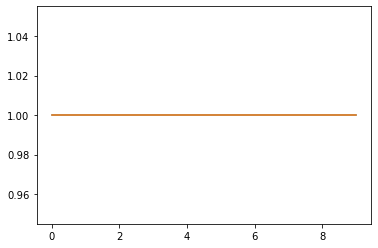

In [445]:
plt.plot(egitim.history["accuracy"])
plt.plot(egitim.history["val_accuracy"])
plt.show()